In [35]:
!pip install transformers==4.35.2
!pip install sentence-transformers
!pip install simpletransformers
!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade gensim
!pip install datasets
!pip install evaluate
!pip install keras==2.11.0
!pip install sentencepiece
!pip install --upgrade 'optree>=0.13.0'
!pip install xgboost
!pip install --upgrade threadpoolctl

  Using cached numpy-2.2.4-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp312-cp312-macosx_14_0_arm64.whl (5.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.19.0 requires keras>=3.5.0, but you have keras 2.11.0 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.4 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.2.4 wh

In [1]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
#For Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sentence_transformers import SentenceTransformer

#Transformer models
from simpletransformers.classification import ClassificationModel

/opt/anaconda3/lib/python3.12/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/opt/anaconda3/lib/python3.12/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [3]:
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from collections import Counter

In [4]:
train = pd.read_csv('./tam-sentiment-train.csv',sep=',')

train

,text,category
0,Vani bhojam fans hit like solli 500 like Vangi...,unknown_state
1,I love you ajith very I like,Positive
2,ennaya trailer Ku mudi Ellam nikkudhu... Vera ...,Positive
3,Vijay Annaa Ur Maassssss Therrrrriiiiii,Positive
4,நம்ப நடே நாசாமா தான் போச்சி,Negative
...,...,...
33984,ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி போடுவது...,Mixed_feelings
33985,Repeated Mode to Watching Theri Trailer & Ther...,Positive
33986,yeevanikuachu pula kutti erudhal oodi poyidu....,Negative
33987,She is looking like laughing budha,Positive


<Axes: ylabel='category'>

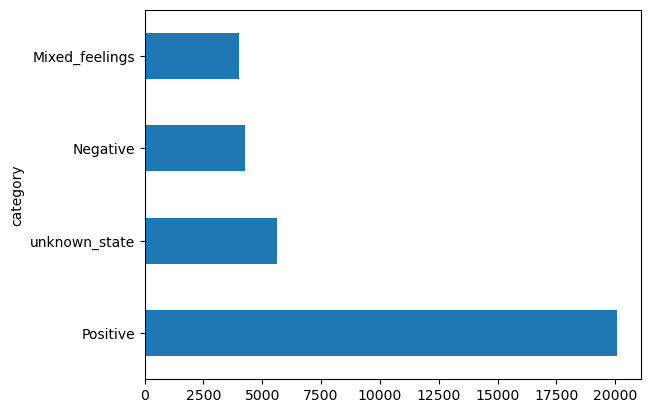

In [5]:
train['category'].value_counts().plot(kind='barh')

In [6]:
train.category.unique()

array(['unknown_state', 'Positive', 'Negative', 'Mixed_feelings'],
      dtype=object)

In [7]:
train['category'].value_counts()

category
Positive          20070
unknown_state      5628
Negative           4271
Mixed_feelings     4020
Name: count, dtype: int64

In [8]:
word_counts = train['text'].str.split(expand=True).stack().value_counts()

In [9]:
#Most Frequent Words
word_counts.head(50)

like             3204
படம்             2072
la               2025
mass             1860
trailer          1733
level            1733
ah               1628
da               1603
padam            1580
movie            1544
Thala            1469
சார்பாக          1459
thala            1449
fans             1423
வெற்றி           1378
வாழ்த்துக்கள்    1281
vera             1256
Vera             1205
nu               1150
oru              1138
இந்த             1119
ku               1088
sir              1081
super            1018
பெற              1007
waiting           890
I                 805
likes             778
and               772
for               744
hit               737
iruku             733
ஒரு               721
semma             711
anna              706
than              701
a                 696
Anna              681
is                663
Trailer           662
love              632
.                 625
Surya             613
va                594
in                592
views     

In [10]:
def tolower(text):
  return text.lower()

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def removepunctuation(text):
    clean="".join([i for i in text if i not in string.punctuation])
    return clean

In [13]:
#Stemming Sample
from nltk.stem import PorterStemmer
e_words= ["wait", "waiting", "waited", "waits"]
ps = PorterStemmer()
for w in e_words:
    rootWord = ps.stem(w)
    print("Stemming for {} is {}".format(w, rootWord))

Stemming for wait is wait
Stemming for waiting is wait
Stemming for waited is wait
Stemming for waits is wait


In [14]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [15]:
nltk.download('stopwords')
stopwords_list = stopwords.words('english')
stopwords_list.extend(['ena','unaku','per','irukanga','panna','yarum','mattum','ivan','ada','pesa','unakku','k','sari','idhu','vida','vittu','enga','yen','ithu','poda','dey','irundhu','ya','la', 'u','r','s','a','bro','da','dei','dai','nu','ah','nee','ni','illa','un','ok','na','pls','ur','unga'])
stopwords_list.extend(['அந்த', 'இது', 'என்ன', 'என்', 'உங்கள்', 'உள்ளது', 'எனக்கு', 'இந்த', 'அவர்கள்', 'எனக்கு', 'இந்த', 'அவர்கள்', 'இந்த', 'அந்த', 'உங்கள்', 'என்', 'அனைத்து', 'இது', 'அவர்கள்', 'இந்த', 'அவர்கள்', 'இந்த', 'அவர்கள்', 'இந்த', 'அவர்கள்', 'இந்த', 'அவர்கள்', 'என்ன', 'என்', 'உங்கள்', 'என்ன', 'அவர்கள்', 'எனக்கு', 'என்', 'உங்கள்', 'இது', 'அந்த', 'இது', 'அவர்கள்', 'இது', 'அவர்கள்', 'இந்த', 'அவர்கள்', 'இந்த', 'அவர்கள்', 'இந்த', 'அவர்கள்', 'இந்த', 'அந்த', 'உங்கள்', 'என்', 'அனைத்து', 'இந்த', 'அவர்கள்', 'இந்த', 'அவர்கள்', 'இந்த', 'அவர்கள்', 'இந்த', 'அவர்கள்', 'இந்த', 'அவர்க'])
stopwords_list.extend(['indha','antha','vera','iruka','iruku','pola','innum','avan','summa','ellam','thaan','romba','ana','ama','apdi','ithula','po','evlo','eruku','irukum','nama','enna','va','hi','h','ku','iruku','naa','va','oru','athu','avanga','neenga','tha','en','di','dhan','ne','ella','intha'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saathvik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
stopwords_list[:5]

['a', 'about', 'above', 'after', 'again']

In [17]:
def removestopwords(text):
  clean = " ".join([word for word in text.split() if word not in stopwords_list])
  return clean

In [18]:
def preprocess(df):
  df['text']= df['text'].apply(lambda x:tolower(x))
  df['text']= df['text'].apply(lambda x:removepunctuation(x))
  df['text']= df['text'].apply(lambda x:deEmojify(x))
  df['text']= df['text'].apply(lambda x:removestopwords(x))
  return df

In [19]:
def preprocess_test(df):
  df['Text']= df['Text'].apply(lambda x:tolower(x))
  df['Text']= df['Text'].apply(lambda x:removepunctuation(x))
  df['Text']= df['Text'].apply(lambda x:deEmojify(x))
  df['Text']= df['Text'].apply(lambda x:removestopwords(x))
  return df

In [20]:
dev = pd.read_csv('./tam-sentiment-dev.csv',sep=',')

dev

,text,category
0,@0:40 songsuperb..kamallllla.. I'm waiting fo...,unknown_state
1,கணத்ததோர் அகமுடையார் சார்பாக படம் வெற்றி அடைய...,Positive
2,Thalavia neenga veera level boss and neega tha...,Positive
3,Oru padam patha fell.vera level music,Positive
4,Hairstyle than mattama iruku. Adhu mattum math...,unknown_state
...,...,...
3781,0:23 thuu ena Elavu cg da athu🤮🤮,unknown_state
3782,நாடக காதல் மிகப்பெரிய தவறு. இதை தான் இந்த படம்...,Positive
3783,Super sK ettan adipoli makkalle dec20 waiti...,Mixed_feelings
3784,Minimum 50m viewa vara veppoma all thala fans,Positive


In [21]:
test = pd.read_csv('./tam_test_without_labels.csv',sep=',', names = ["id", "Text"])

test

,id,Text
0,id,Text
1,TAM_01,இது புதுவகை கொள்ளை கூட்டம்
2,TAM_02,சுட்டுக்கொல்ல வேண்டும் அல்லது குண்டர் சட்டத்தி...
3,TAM_03,இந்த திருநங்கைகள் பொதுமக்களுக்கு பொது இடங்களில...
4,TAM_04,அராஜகம் செய்து தங்களுடைய மதிப்பை தாங்களே கெடுத...
...,...,...
645,TAM_645,பல நாள் திருடன் ஒரு நாள் அகப்படுவான்
646,TAM_646,"கர்நாடாகாவில் இருந்து தமிழர்களை,காவிரி பிரச்சன..."
647,TAM_647,"கருணா பெயர் கொண்ட நாடு, கறு நாடு அகம்."
648,TAM_648,@Thamizhmuckkan venkatraman RN கார் (மழை) + நா...


In [22]:
#Converting the text to a string
train.text=train.text.astype(str)
test.Text=test.Text.astype(str)
dev.text=dev.text.astype(str)

#Preprocessing
train = preprocess(train)
dev = preprocess(dev)
test = preprocess_test(test)

In [23]:
train = train[["text", "category"]]
dev = dev[["text", "category"]]
test = test[["id", "Text"]]
train

,text,category
0,vani bhojam fans hit like solli 500 like vangi...,unknown_state
1,love ajith like,Positive
2,ennaya trailer mudi nikkudhu level trailer,Positive
3,vijay annaa maassssss therrrrriiiiii,Positive
4,நம்ப நடே நாசாமா தான் போச்சி,Negative
...,...,...
33984,ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி போடுவது...,Mixed_feelings
33985,repeated mode watching theri trailer theri son...,Positive
33986,yeevanikuachu pula kutti erudhal oodi poyidu m...,Negative
33987,looking like laughing budha,Positive


In [24]:
label = {'unknown_state': 0, 'Positive': 1, 'Mixed_feelings': 2, 'Negative': 3}
train['category'] = train['category'].map(label)
dev['category'] = dev['category'].map(label)
train

,text,category
0,vani bhojam fans hit like solli 500 like vangi...,0
1,love ajith like,1
2,ennaya trailer mudi nikkudhu level trailer,1
3,vijay annaa maassssss therrrrriiiiii,1
4,நம்ப நடே நாசாமா தான் போச்சி,3
...,...,...
33984,ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி போடுவது...,2
33985,repeated mode watching theri trailer theri son...,1
33986,yeevanikuachu pula kutti erudhal oodi poyidu m...,3
33987,looking like laughing budha,1


In [25]:
#Finding the most frequent words in each category
def vocab(df, top_k=1000):
  return df.groupby('category')['text'].apply(lambda x: Counter(" ".join(x).split()).most_common(top_k))

#Finding the unique most frequent words across all categories
def getVocab(df):
  df_vocab = vocab(df)
  processed = list(set([key for groups in df_vocab for key, value in groups]))
  return processed

vocab = getVocab(train)
vocab = list(set(vocab))

vocab[:10]

['பெயர்',
 'rocking',
 'உங்களுக்கு',
 'irukku',
 'masala',
 'god',
 'raja',
 'thaanda',
 'potavan',
 'oda']

In [26]:
#TF-IDF Vectorizer - sparse matrix, count based, word level frequency importance
tfidf_vec = TfidfVectorizer(analyzer = 'word', vocabulary = vocab)

In [27]:
#Getting sentence embeddings - Language-agnostic BERT Sentence Embedding - captures semantic (meaning) details, multilingual support
labse_embedding_model = SentenceTransformer('sentence-transformers/LaBSE')

/opt/anaconda3/lib/python3.12/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [28]:
def fitTfidfVectrain(df, tfidf_vec):
  x_df = tfidf_vec.fit_transform(df['text'])
  return x_df

def getX(model, df, tfidf_vec):
  #Generate TF-IDF vectors
  model_tf_x = fitTfidfVectrain(df, tfidf_vec)
  #Generate sentence embeddings
  model_val_x = model.encode(df['text'].tolist())
  #Combining embeddings
  Xval = [np.append(list1, list2) for list1, list2 in zip(model_val_x, model_tf_x.toarray())]
  return Xval

def getY(df):
  return df['category']

In [29]:
X_train = getX(labse_embedding_model, train, tfidf_vec)
y_train = getY(train)

X_test = getX(labse_embedding_model, dev, tfidf_vec)
y_test = getY(dev)

In [36]:
#generate all 0 array and print classification report (worst case)
from sklearn.metrics import classification_report, accuracy_score

baseline_y = [0 for i in range(len(y_test))]
print(classification_report(y_test, baseline_y, zero_division=0))

              precision    recall  f1-score   support

           0       0.16      1.00      0.28       611
           1       0.00      0.00      0.00      2257
           2       0.00      0.00      0.00       438
           3       0.00      0.00      0.00       480

    accuracy                           0.16      3786
   macro avg       0.04      0.25      0.07      3786
weighted avg       0.03      0.16      0.04      3786



In [37]:
#LOGISTIC REGRESSION - Quasi-Newton method - Fast and robust for multiclass
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.6465927099841522

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.34      0.40       611
           1       0.70      0.89      0.79      2257
           2       0.41      0.17      0.24       438
           3       0.50      0.32      0.39       480

    accuracy                           0.65      3786
   macro avg       0.52      0.43      0.45      3786
weighted avg       0.61      0.65      0.61      3786



In [38]:
#LOGISTIC REGRESSION - Newton-Raphson method - 	Slower, but accurate
log_reg = LogisticRegression(solver='newton-cg', max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.6468568409931326

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.35      0.40       611
           1       0.70      0.89      0.79      2257
           2       0.41      0.17      0.24       438
           3       0.50      0.32      0.39       480

    accuracy                           0.65      3786
   macro avg       0.52      0.43      0.45      3786
weighted avg       0.61      0.65      0.61      3786



In [39]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5047543581616482

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.33      0.33       611
           1       0.68      0.68      0.68      2257
           2       0.18      0.18      0.18       438
           3       0.21      0.21      0.21       480

    accuracy                           0.50      3786
   macro avg       0.35      0.35      0.35      3786
weighted avg       0.51      0.50      0.51      3786



In [40]:
#RANDOM FOREST CLASSIFIER with different maximum depths
from sklearn.ensemble import RandomForestClassifier

max_depths = [10, 20, 30]
best_max_depth = 0
best_accuracy = 0

for max_depth in max_depths:
  rf_model = RandomForestClassifier(
      n_estimators=100,      # Number of trees in the forest
      max_depth=max_depth,   # Limit depth to prevent overfitting
      random_state=42
  )

  rf_model.fit(X_train, y_train)

  y_pred = rf_model.predict(X_test)

  print("Maximum Depth:", max_depth)

  accuracy = accuracy_score(y_test, y_pred)
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_max_depth = max_depth

  print("Accuracy:", accuracy)
  print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
  print()

print("Best Maximum Depth:", best_max_depth)

Maximum Depth: 10
Accuracy: 0.6053882725832013

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.05      0.10       611
           1       0.60      1.00      0.75      2257
           2       0.62      0.01      0.02       438
           3       0.00      0.00      0.00       480

    accuracy                           0.61      3786
   macro avg       0.52      0.27      0.22      3786
weighted avg       0.57      0.61      0.47      3786


Maximum Depth: 20
Accuracy: 0.6133122028526149

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.09      0.16       611
           1       0.61      0.99      0.76      2257
           2       0.53      0.05      0.08       438
           3       0.55      0.04      0.07       480

    accuracy                           0.61      3786
   macro avg       0.58      0.29      0.27      3786
weighted avg       0.60      0.61      0

In [41]:
#RANDOM FOREST CLASSIFIER with different n_estimators
n_estimators = [100, 200, 300]

best_n_estimator = 0
best_accuracy = 0

for n_estimator in n_estimators:
  rf_model = RandomForestClassifier(
      n_estimators=n_estimator,   # Number of trees in the forest
      max_depth=best_max_depth,   # Limit depth to prevent overfitting
      random_state=42
  )

  rf_model.fit(X_train, y_train)

  y_pred = rf_model.predict(X_test)

  print("Number of trees in the forest:", n_estimator)

  accuracy = accuracy_score(y_test, y_pred)
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_n_estimator = n_estimator

  print("Accuracy:", accuracy)
  print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
  print()

print("Best number of trees in the forest (n_estimator):", best_n_estimator)

Number of trees in the forest: 100
Accuracy: 0.6170100369783412

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.13      0.21       611
           1       0.62      0.98      0.76      2257
           2       0.43      0.04      0.07       438
           3       0.46      0.04      0.07       480

    accuracy                           0.62      3786
   macro avg       0.54      0.30      0.28      3786
weighted avg       0.58      0.62      0.51      3786


Number of trees in the forest: 200
Accuracy: 0.6148969889064976

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.11      0.19       611
           1       0.62      0.98      0.76      2257
           2       0.56      0.05      0.08       438
           3       0.59      0.04      0.07       480

    accuracy                           0.61      3786
   macro avg       0.59      0.29      0.27      3786
weight

In [42]:
#XGBOOST
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='multi:softmax',  # for multiclass classification
    num_class=4,                # number of classes
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6413100898045431

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.27      0.37       611
           1       0.66      0.95      0.78      2257
           2       0.47      0.08      0.14       438
           3       0.51      0.17      0.25       480

    accuracy                           0.64      3786
   macro avg       0.55      0.37      0.38      3786
weighted avg       0.60      0.64      0.57      3786



In [43]:
#NAIVE BAYES - GAUSSIAN - Assumes features are continuous and follows a Normal Curve
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.265715795034337

Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.82      0.34       611
           1       0.85      0.12      0.21      2257
           2       0.15      0.29      0.20       438
           3       0.38      0.24      0.29       480

    accuracy                           0.27      3786
   macro avg       0.40      0.37      0.26      3786
weighted avg       0.61      0.27      0.24      3786



In [44]:
#NAIVE BAYES - MULTINOMIAL - Assumes features are discrete
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(fitTfidfVectrain(train, tfidf_vec), y_train)

y_pred = nb_model.predict(fitTfidfVectrain(dev, tfidf_vec))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6323296354992076

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.17      0.26       611
           1       0.65      0.96      0.77      2257
           2       0.36      0.02      0.04       438
           3       0.49      0.23      0.31       480

    accuracy                           0.63      3786
   macro avg       0.52      0.35      0.35      3786
weighted avg       0.58      0.63      0.55      3786



In [45]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 31)
accuracies = []

best_k = 0
best_accuracy = 0

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    if acc > best_accuracy:
        best_k = k
        best_accuracy = acc
        
    accuracies.append(acc)
    print(f"K = {k}, Accuracy = {acc:.4f}")

print("\nBEST K =", best_k)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


K = 1, Accuracy = 0.5473
K = 2, Accuracy = 0.5573
K = 3, Accuracy = 0.5803
K = 4, Accuracy = 0.5993
K = 5, Accuracy = 0.6130
K = 6, Accuracy = 0.6125
K = 7, Accuracy = 0.6220
K = 8, Accuracy = 0.6223
K = 9, Accuracy = 0.6260
K = 10, Accuracy = 0.6212
K = 11, Accuracy = 0.6244
K = 12, Accuracy = 0.6265
K = 13, Accuracy = 0.6273
K = 14, Accuracy = 0.6289
K = 15, Accuracy = 0.6289
K = 16, Accuracy = 0.6292
K = 17, Accuracy = 0.6276
K = 18, Accuracy = 0.6273
K = 19, Accuracy = 0.6305
K = 20, Accuracy = 0.6326
K = 21, Accuracy = 0.6294
K = 22, Accuracy = 0.6260
K = 23, Accuracy = 0.6273
K = 24, Accuracy = 0.6233
K = 25, Accuracy = 0.6260
K = 26, Accuracy = 0.6244
K = 27, Accuracy = 0.6263
K = 28, Accuracy = 0.6260
K = 29, Accuracy = 0.6278
K = 30, Accuracy = 0.6276

BEST K = 20


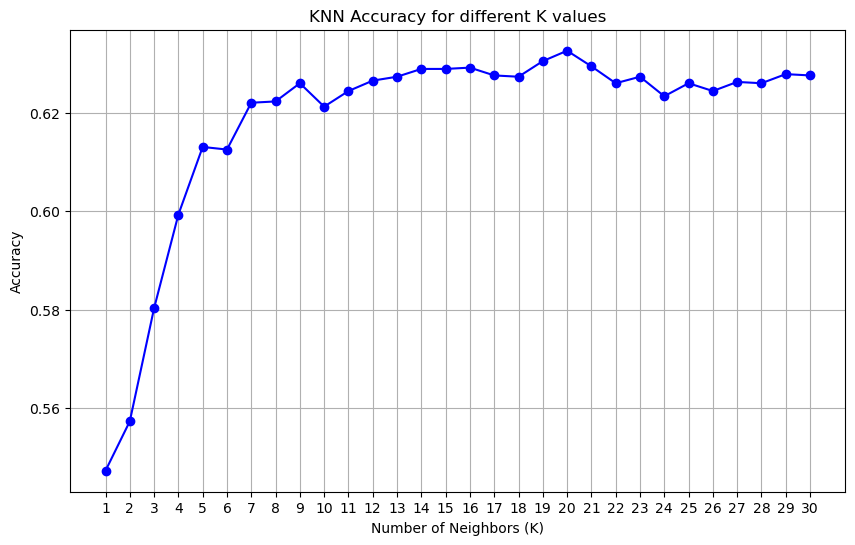

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('KNN Accuracy for different K values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()

In [47]:
#LINEAR SVM
from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.6492340200739567

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.35      0.40       611
           1       0.70      0.90      0.79      2257
           2       0.44      0.17      0.24       438
           3       0.51      0.31      0.38       480

    accuracy                           0.65      3786
   macro avg       0.53      0.43      0.45      3786
weighted avg       0.61      0.65      0.61      3786



In [61]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca_full = PCA()
X_train_pca_full = pca_full.fit_transform(X_train_scaled)


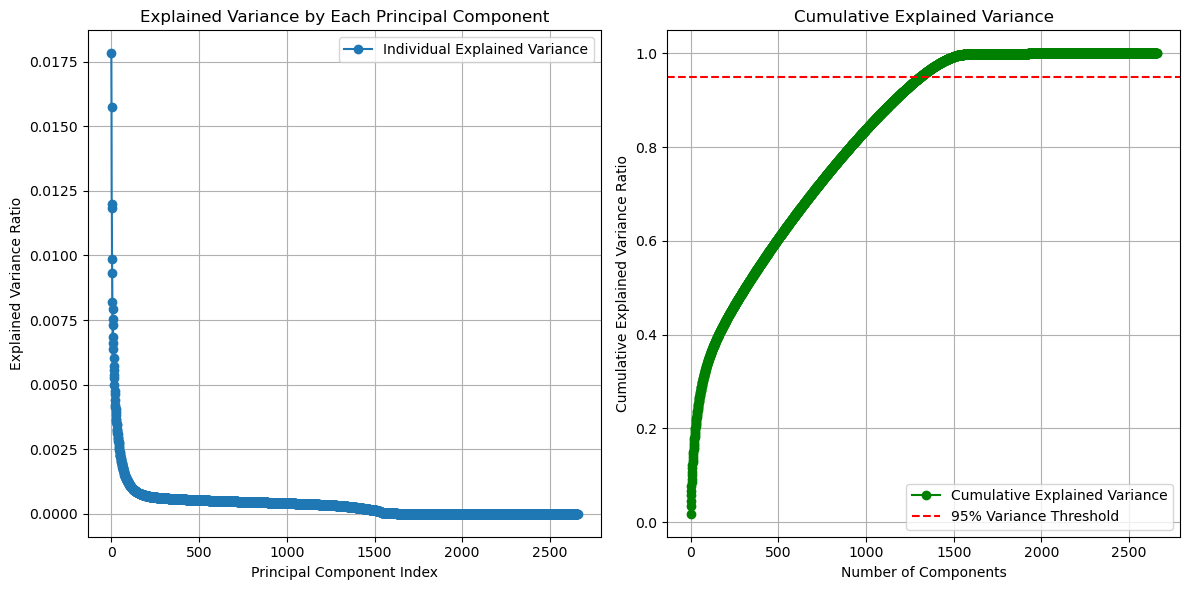

In [62]:
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(12, 6))

# Explained variance per component
plt.subplot(1, 2, 1)
plt.plot(explained_variance, marker='o', label='Individual Explained Variance')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.legend()

# Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(cumulative_variance, marker='o', color='green', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [67]:
total_components = len(explained_variance)
components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Total Components: {total_components}")
print(f"Number of components to retain 95% variance: {components_95}")

Total Components: 2658
Number of components to retain 95% variance: 1311


In [69]:
pca_final = PCA(n_components=components_95)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

print(f"Original number of features: {X_train_scaled.shape[1]}")
print(f"Reduced number of LDA components: {X_train_lda.shape[1]}")
print(f"Number of classes: {len(np.unique(y_train))} -> Max LDA components = {len(np.unique(y_train)) - 1}")

Original number of features: 2658
Reduced number of LDA components: 3
Number of classes: 4 -> Max LDA components = 3


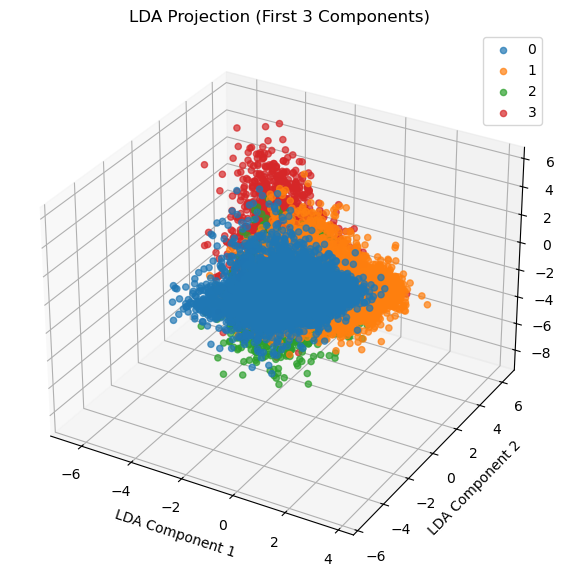

In [91]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(y_train):
    ax.scatter(
        X_train_lda[np.array(y_train) == label, 0],
        X_train_lda[np.array(y_train) == label, 1],
        X_train_lda[np.array(y_train) == label, 2],
        label=str(label),
        alpha=0.7
    )

ax.set_title('LDA Projection (First 3 Components)')
ax.set_xlabel('LDA Component 1')
ax.set_ylabel('LDA Component 2')
ax.set_zlabel('LDA Component 3')
ax.legend()
plt.show()

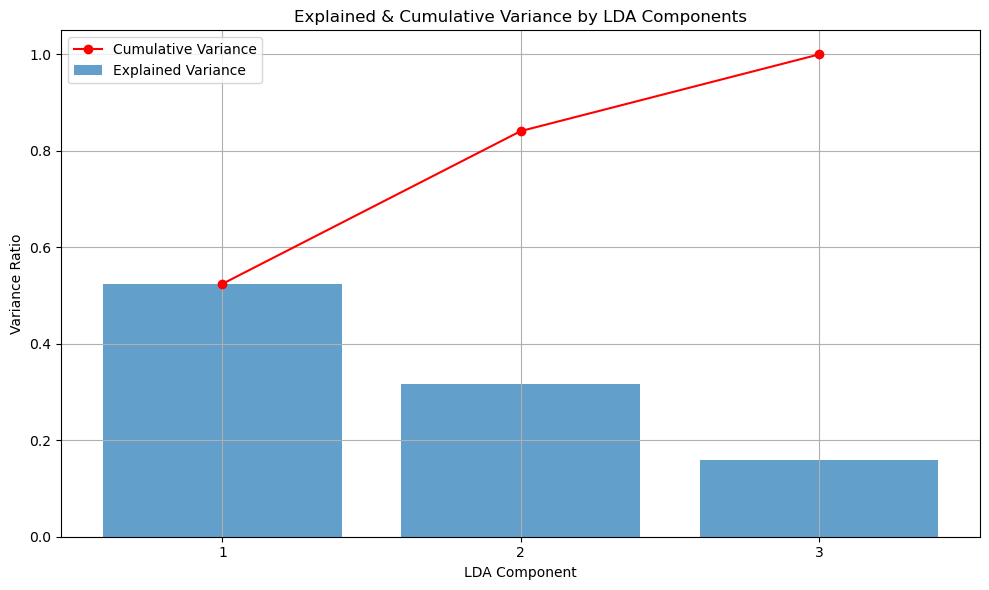

In [95]:
explained_var = lda.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

plt.figure(figsize=(10, 6))
components = np.arange(1, len(explained_var) + 1)

plt.bar(components, explained_var, alpha=0.7, label='Explained Variance')
plt.plot(components, cumulative_var, marker='o', color='red', label='Cumulative Variance')

plt.xlabel('LDA Component')
plt.ylabel('Variance Ratio')
plt.title('Explained & Cumulative Variance by LDA Components')
plt.xticks(components)
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [101]:
#KNN on ORIGINAL DATA
import time

start_time = time.time()

model = KNeighborsClassifier(n_neighbors=20, n_jobs=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

end_time = time.time()

total_time = end_time - start_time

print(f"Accuracy: {accuracy}")
print("Computation Time:", total_time, "s")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6325937665081881
Computation Time: 4.876654148101807 s

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.30      0.38       611
           1       0.66      0.94      0.77      2257
           2       0.37      0.06      0.11       438
           3       0.52      0.12      0.20       480

    accuracy                           0.63      3786
   macro avg       0.52      0.36      0.36      3786
weighted avg       0.58      0.63      0.56      3786



In [113]:
#KNN on PCA DATA
start_time = time.time()

model = KNeighborsClassifier(n_neighbors=20, n_jobs=1)

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)

end_time = time.time()

total_time = end_time - start_time

print(f"Accuracy: {accuracy}")
print("Computation Time:", total_time, "s")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6320655044902271
Computation Time: 2.3645386695861816 s

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.28      0.36       611
           1       0.66      0.94      0.77      2257
           2       0.41      0.08      0.13       438
           3       0.53      0.14      0.22       480

    accuracy                           0.63      3786
   macro avg       0.52      0.36      0.37      3786
weighted avg       0.59      0.63      0.56      3786



In [108]:
#KNN on LDA DATA
start_time = time.time()

model = KNeighborsClassifier(n_neighbors=20, n_jobs=1)

model.fit(X_train_lda, y_train)

y_pred = model.predict(X_test_lda)

accuracy = accuracy_score(y_test, y_pred)

end_time = time.time()

total_time = end_time - start_time

print(f"Accuracy: {accuracy}")
print("Computation Time:", total_time, "s")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.630216587427364
Computation Time: 0.0795280933380127 s

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.39      0.42       611
           1       0.72      0.84      0.78      2257
           2       0.33      0.19      0.24       438
           3       0.46      0.34      0.39       480

    accuracy                           0.63      3786
   macro avg       0.49      0.44      0.46      3786
weighted avg       0.60      0.63      0.61      3786

